# POS

* Noun (N)- Daniel, London, table, dog, teacher, pen, city, happiness, hope
* Verb (V)- go, speak, run, eat, play, live, walk, have, like, are, is
* Adjective(ADJ)- big, happy, green, young, fun, crazy, three
* Adverb(ADV)- slowly, quietly, very, always, never, too, well, tomorrow
* Preposition (P)- at, on, in, from, with, near, between, about, under
* Conjunction (CON)- and, or, but, because, so, yet, unless, since, if
* Pronoun(PRO)- I, you, we, they, he, she, it, me, us, them, him, her, this
* Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

# NER

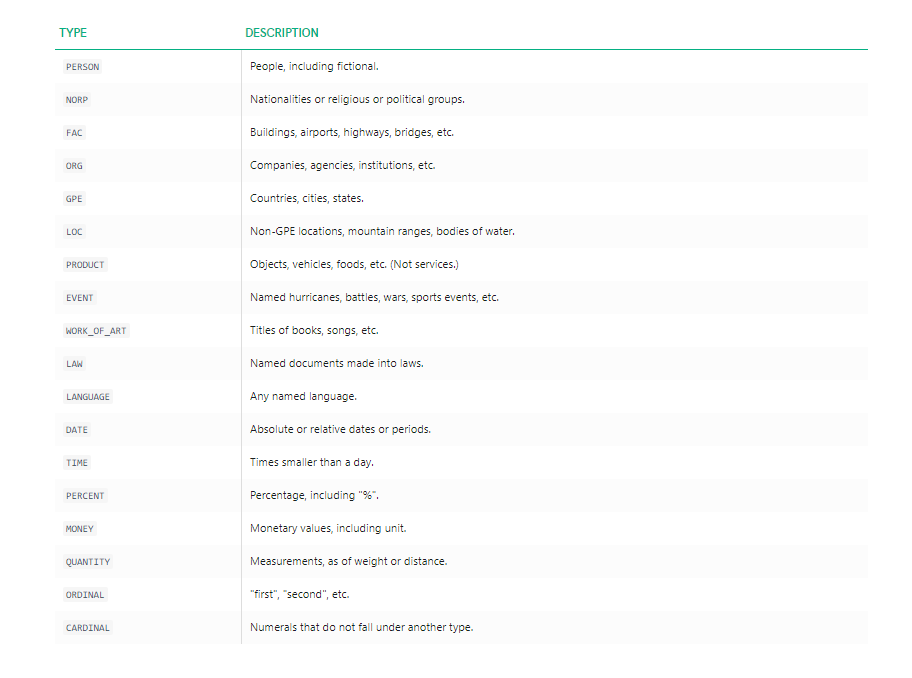

In [3]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

# BASIC

In [5]:
doc = nlp("European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.I was working in Singapore")

In [6]:
print("doc.ents ", doc.ents)

doc.ents  (European, Google, $5.1 billion, Wednesday, Singapore)


In [9]:
for X in doc.ents:
   print( X.text, X.label_)

European NORP
Google ORG
$5.1 billion MONEY
Wednesday DATE
Singapore GPE
year DATE
2017 DATE
april 2014 DATE
11 CARDINAL
2017 DATE
2017-2018 DATE
2017 DATE
2018 DATE
2016 DATE
4thsem CARDINAL
2016 DATE
3d CARDINAL
3d ORDINAL
2015 CARDINAL
3rdsem CARDINAL
2015 DATE
3rdsem CARDINAL
2014 DATE


#  For a single news review

In [10]:
article = nlp("WASHINGTON — Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped oversee the Hillary Clinton email and Russia investigations, has been fired for violating bureau policies, Mr. Strzok’s lawyer said Monday.Mr. Trump and his allies seized on the texts — exchanged during the 2016 campaign with a former F.B.I. lawyer, Lisa Page — in assailing the Russia investigation as an illegitimate “witch hunt.” Mr. Strzok, who rose over 20 years at the F.B.I. to become one of its most experienced counterintelligence agents, was a key figure in the early months of the inquiry.Along with writing the texts, Mr. Strzok was accused of sending a highly sensitive search warrant to his personal email account.The F.B.I. had been under immense political pressure by Mr. Trump to dismiss Mr. Strzok, who was removed last summer from the staff of the special counsel, Robert S. Mueller III. The president has repeatedly denounced Mr. Strzok in posts on Twitter, and on Monday expressed satisfaction that he had been sacked.Mr. Trump’s victory traces back to June, when Mr. Strzok’s conduct was laid out in a wide-ranging inspector general’s report on how the F.B.I. handled the investigation of Hillary Clinton’s emails in the run-up to the 2016 election. The report was critical of Mr. Strzok’s conduct in sending the texts, and the bureau’s Office of Professional Responsibility said that Mr. Strzok should be suspended for 60 days and demoted. Mr. Strzok had testified before the House in July about how he had not allowed his political views to interfere with the investigations he was overseeing.But Mr. Strzok’s lawyer said the deputy director of the F.B.I., David Bowdich, had overruled the Office of Professional Responsibility and fired Mr. Strzok.A spokeswoman for the F.B.I. did not respond to a message seeking comment about why Mr. Strzok was dismissed rather than demoted. Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire.")


In [11]:
label_count = [x.label_ for x in article.ents]
Counter(labels)

Counter({'GPE': 12, 'PERSON': 24, 'DATE': 10, 'EVENT': 1, 'ORG': 4})

# NER

In [15]:
mList =  [(X.text, X.label_) for X in article.ents]
mList

[('WASHINGTON', 'GPE'),
 ('Peter Strzok', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('Trump', 'PERSON'),
 ('Hillary Clinton', 'PERSON'),
 ('Russia', 'GPE'),
 ('Strzok', 'PERSON'),
 ('Monday', 'DATE'),
 ('2016', 'DATE'),
 ('F.B.I.', 'GPE'),
 ('Lisa Page — in', 'PERSON'),
 ('Russia', 'GPE'),
 ('Strzok', 'PERSON'),
 ('20 years', 'DATE'),
 ('F.B.I.', 'GPE'),
 ('the early months', 'DATE'),
 ('Strzok', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('Trump', 'PERSON'),
 ('Strzok', 'PERSON'),
 ('last summer', 'DATE'),
 ('Robert S. Mueller III', 'PERSON'),
 ('Strzok', 'PERSON'),
 ('Twitter', 'EVENT'),
 ('Monday', 'DATE'),
 ('Trump’s', 'ORG'),
 ('June', 'DATE'),
 ('Strzok', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('Hillary Clinton’s', 'PERSON'),
 ('2016', 'DATE'),
 ('Strzok', 'PERSON'),
 ('Office of Professional Responsibility', 'ORG'),
 ('Strzok', 'PERSON'),
 ('60 days', 'DATE'),
 ('Strzok', 'PERSON'),
 ('House', 'ORG'),
 ('July', 'DATE'),
 ('Strzok', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('David Bowdich', 'PERSON'),
 ('the Office 

In [25]:
#tuple unpacking
for a,b in mList:
    if (b == "DATE" ):
        print(a)    

Monday
2016
20 years
the early months
last summer
Monday
June
2016
60 days
July


# Most Common

In [28]:
Counter(mList).most_common(3)

[(('Strzok', 'PERSON'), 13), (('F.B.I.', 'GPE'), 9), (('Trump', 'PERSON'), 3)]

# filtering via sentences

In [34]:
# sentences = [x for x in article.sents]

In [36]:
sentences ="Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire."

In [37]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

* One miss-classification here is F.B.I. It is hard, isn’t it?
* GPE is Countries, Cities , state

# dependency parsing

In [39]:
displacy.render(nlp(str(sentences)), style='dep', jupyter = True, options = {'distance': 120})

# POS